# 

Data Analysis in Geoscience Remote Sensing Projects: Exercises
## Final task handed in by: Sunil Khatri, on 31st March 2022
Hendrik Andersen, contact: hendrik.andersen@kit.edu

## Part one: Regression and sensitivity estimation with remote sensing data

For this part you are provided with a data set contained in the file 'data_final_task.csv'. The data contains information on regional averages of low-cloud occurrence and meteorological factors in the Southeast Atlantic (10°S-20°S, 0°E-10°E - this means that the study area is about 1000 km x 1000 km large). The DataFrame contains the following variables:
- sst: sea surface temperature
- eis: estimated inversion strength
- t_adv: temperature advection
- w700: vertical pressure velocity at 700 hPa (this is the vertical wind speed, given in Pa/s: positive numbers mean subsiding air masses)
- rhft: relative humidity in the free troposphere (free troposphere is above the cloud layer)
- clf: Liquid water cloud fraction

The data on clouds are from a satellite data set from the MODIS sensor on board NASA's Terra satellite. The product name is MOD08_M3, downloaded from https://ladsweb.modaps.eosdis.nasa.gov/ for more information check out https://ladsweb.modaps.eosdis.nasa.gov/missions-and-measurements/products/MOD08_M3/#overview

The meteorological data are ERA5 reanalysis data on meteorological factors thought to be important for low cloud cover. The data is downloaded from https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

For more information on how reanalysis data are generated, check out the 2-minute video from Copernicus ECMWF here: https://www.youtube.com/watch?v=FAGobvUGl24

Your task is to analyze the data to
1. quantitatively and visually describe the data 
2. analyze relationships between cloud fraction and the cloud-controlling factors using
    - regression analysis
    - a machine learning model (e.g. feature importance, SHAP)
3. describe the results of your analyses in the provided markdown cells. Are your results in agreement with the described relationships in the following study?: Klein et al. (2017): Low-Cloud Feedbacks from Cloud-Controlling Factors: A Review, Surveys in Geophysics, doi: 10.1007/s10712-017-9433-3

## Part two: Classification in a remote sensing retrieval setting

For the second part of the exercise, you are tasked to develop a machine learning method to detect fog and low clouds for a location in the Namib Desert on the basis of observations from a geostationary satellite platform. You are provided a data set of night-time satellite observations at different wave lengths over a meteorological measurement station. The geostationary satellite (Spinning Enhanced Visible and Infrared Imager; SEVIRI) makes a scan every 15 minutes at a spatial resolution of 3km x 3km. For the exact time steps of the satellite observations made available here, a boolean (True/False) data set on the presence of fog and low clouds from the measurement station is provided, which should be used as the labeled target data.
- IR_016: Measurements at the 1.6 µm channel
- IR_039: Measurements at the 3.9 µm channel
- IR_087: Measurements at the 8.7 µm channel
- IR_097: Measurements at the 9.7 µm channel
- IR_108: Measurements at the 10.8 µm channel
- IR_120: Measurements at the 12.0 µm channel
- IR_134: Measurements at the 13.4 µm channel
- station_fls: A boolean (True/False) information if fog or low clouds are present at the given time

Your task is to analyze the data to
1. Train and optimize a machine learning classifier (e.g. GradientBoostingClassifier) to detect fog and low clouds and analyze the results using a confusion matrix and using performance metrics
2. Compare the results to a logistic regression approach, and discuss  in the provided markdown cell which method is better at classifying fog and low cloud presence/absence
3. Compare the results to a dedicated detection approach developed for the region in Andersen and Cermak (2018): First fully diurnal fog and low cloud satellite detection reveals life cycle in the Namib, Atmospheric Measurement Techniques, doi: 10.5194/amt-11-5461-2018. Use the provided markdown cell for the discussion.

You can find more specific tasks in the cells below


## Part one: Regression and sensitivity estimation with remote sensing data
__Task__: 
In a typical scientific workflow, the first step is to get an overview of the data. Typically, visualizations and descriptive statistics are very useful to achieve this.  
1. Use pandas to load the dataset, use the time column as the index column
2. Calculate the mean and standard deviation of cloud fraction and plot the distribution of cloud fraction in a histogram.
3. Plot the CLF time series and describe seasonal patterns.

In [70]:
# use this cell for your code, make sure to comment your code to make it understandable
# just to get you started:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data_df = pd.read_csv("data_final_task_regression.csv", index_col='time', parse_dates=True)
data_df.head()

,sst,eis,t_adv,w700,rhft,clf
time,,,,,,
2001-01-01,296.16850,4.824931,-1.682254,0.022467,35.642094,0.663396
2001-02-01,297.11526,3.476827,-1.932790,0.026573,37.940147,0.605880
2001-03-01,298.15900,2.265783,-2.199120,0.031560,33.834457,0.529290
2001-04-01,298.17062,2.402812,-2.532412,0.039651,21.565330,0.464151
2001-05-01,297.06927,3.534788,-2.962148,0.037318,7.997189,0.318764


The mean of cloud fraction is:  0.6522455561224004
The standard deviation of cloud fraction is:  0.15502950170701116


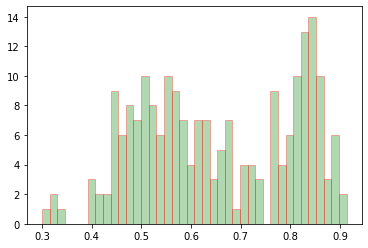

In [71]:


#Calculation of mean, sd of cloud fraction and histogram plot
mean = np.mean(data_df['clf'])
sd= np.std(data_df['clf'])

print('The mean of cloud fraction is: ',str(mean))
print('The standard deviation of cloud fraction is: ',str(sd))

# Histogram plot of cloud fraction distribution
n,bins,patches= plt.hist(data_df['clf'],bins=40,histtype='bar',ec='red',color='g',alpha=0.3)

<function matplotlib.pyplot.show(close=None, block=None)>

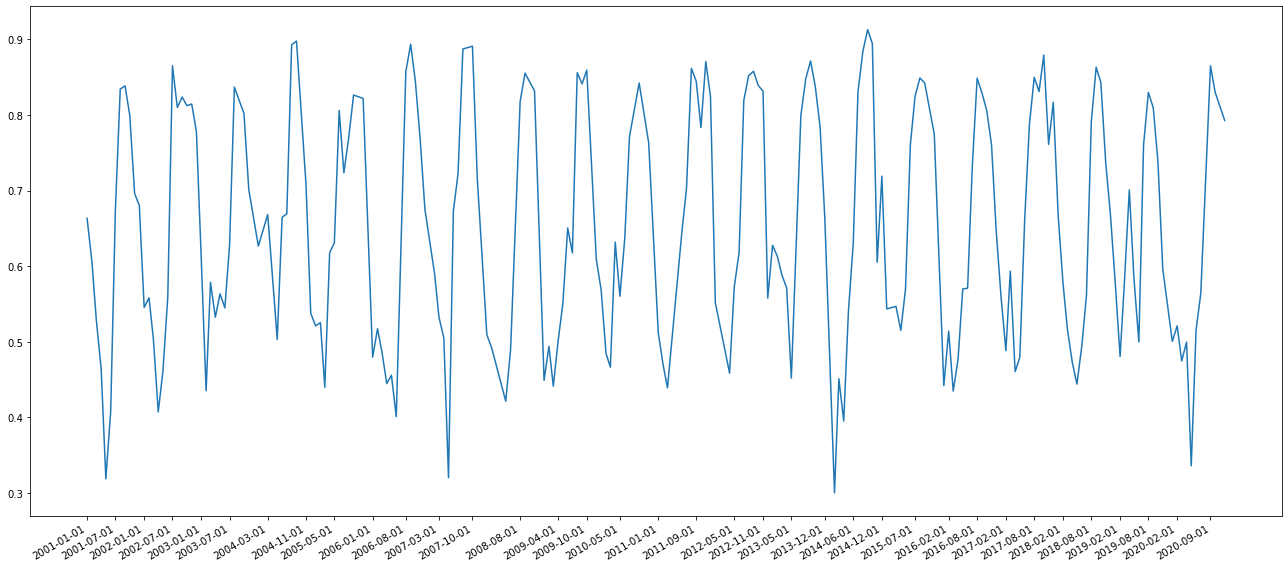

In [72]:
# Time series plot of the CLF 
time=data_df.index
time_len=len(time)
step = int(math.ceil(time_len/40))
ticks = time[::step]
fig = plt.figure(figsize=(18,8))
x=data_df.index
y=data_df['clf']
plt.plot(x,y)
plt.xticks(ticks=ticks)
fig.autofmt_xdate()
plt.tight_layout()
plt.show

The seasonal patterns shows that at each year the CLF values reaches peak at around July and also they attain minimum values at March-April period. There are some fluctuation in the macimum and minimum values between the years but no increasing or decreasing trend over the period of time is observable.

__Task__: 
1. Compute a regression analysis of clf with each meteorological predictor
2. Describe the sensitivities of CLF to the meteorological predictors:
    - How sensitive are low clouds to changes in meteorological predictors (in individual simple regression models, and in a multiple regression framework)?
    - Are the relationships significant?
    - Are there strong correlations between the different predictors that could influence the sensitivity estimates?

Residual sum of squares is : 1.0854513073162093
Residual standard error  is :  0.07172390809221113
Can we reject the 0-hypothesis that there is no relationship between X and y?: True
R2 statistic: 0.79


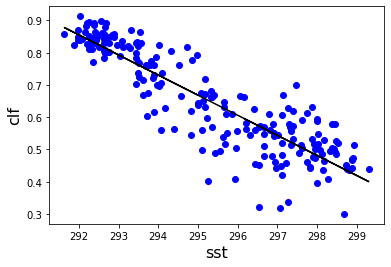

In [73]:
# the individual simple regression models with each predictors are calculated first

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score

df = data_df
regr = LinearRegression()
X = data_df[['sst']]
y = data_df['clf']
regr.fit(X,y)
y_pred = regr.predict(X)
RSS = np.sum(np.square(y_pred - y))
RSE = math.sqrt(RSS / (len(y) - 2))

print('Residual sum of squares is :', str(RSS))
print('Residual standard error  is : ', str(RSE))

slope, intercept, rvalue, pvalue, stderr = stats.linregress(data_df.sst,data_df.clf)
print('Can we reject the 0-hypothesis that there is no relationship between X and y?: '  + str(pvalue < 0.05))
print('R2 statistic: %.2f' % r2_score(y, y_pred))

plt.scatter(X,y,color='blue')
plt.plot(df.sst,regr.predict(X),color='k')
plt.xlabel('sst',fontsize=16)
plt.ylabel('clf',fontsize=16)
plt.show()

Residual sum of squares is : 0.9374346332055604
Residual standard error  is :  0.06665446846874556
Can we reject the 0-hypothesis that there is no relationship between X and y?: True
R2 statistic: 0.82


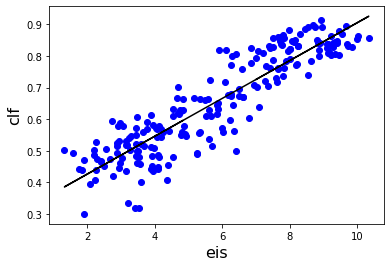

In [74]:
regr = LinearRegression()
X = data_df[['eis']]
y = data_df['clf']
regr.fit(X,y)
y_pred = regr.predict(X)
RSS = np.sum(np.square(y_pred - y))
RSE = math.sqrt(RSS / (len(y) - 2))

print('Residual sum of squares is :', str(RSS))
print('Residual standard error  is : ', str(RSE))

slope, intercept, rvalue, pvalue, stderr = stats.linregress(data_df.eis,data_df.clf)
print('Can we reject the 0-hypothesis that there is no relationship between X and y?: '  + str(pvalue < 0.05))
print('R2 statistic: %.2f' % r2_score(y, y_pred))

plt.scatter(X,y,color='blue')
plt.plot(df.eis,regr.predict(X),color='k')
plt.xlabel('eis',fontsize=16)
plt.ylabel('clf',fontsize=16)
plt.show()

Residual sum of squares is : 4.975643953741308
Residual standard error  is :  0.1535618799233671
Can we reject the 0-hypothesis that there is no relationship between X and y?: True
R2 statistic: 0.03


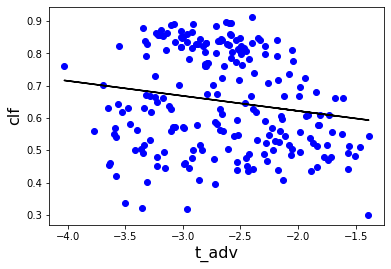

In [75]:
regr = LinearRegression()
X = data_df[['t_adv']]
y = data_df['clf']
regr.fit(X,y)
y_pred = regr.predict(X)
RSS = np.sum(np.square(y_pred - y))
RSE = math.sqrt(RSS / (len(y) - 2))

print('Residual sum of squares is :', str(RSS))
print('Residual standard error  is : ', str(RSE))

slope, intercept, rvalue, pvalue, stderr = stats.linregress(data_df.t_adv,data_df.clf)
print('Can we reject the 0-hypothesis that there is no relationship between X and y?: '  + str(pvalue < 0.05))
print('R2 statistic: %.2f' % r2_score(y, y_pred))

plt.scatter(X,y,color='blue')
plt.plot(df.t_adv,regr.predict(X),color='k')
plt.xlabel('t_adv',fontsize=16)
plt.ylabel('clf',fontsize=16)
plt.show()

Residual sum of squares is : 5.118004086372318
Residual standard error  is :  0.15574319740299916
Can we reject the 0-hypothesis that there is no relationship between X and y?: False
R2 statistic: 0.00


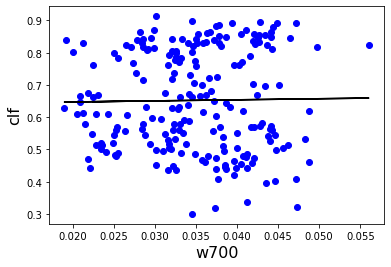

In [76]:
regr = LinearRegression()
X = data_df[['w700']]
y = data_df['clf']
regr.fit(X,y)
y_pred = regr.predict(X)
RSS = np.sum(np.square(y_pred - y))
RSE = math.sqrt(RSS / (len(y) - 2))

print('Residual sum of squares is :', str(RSS))
print('Residual standard error  is : ', str(RSE))

slope, intercept, rvalue, pvalue, stderr = stats.linregress(data_df.w700,data_df.clf)
print('Can we reject the 0-hypothesis that there is no relationship between X and y?: '  + str(pvalue < 0.05))
print('R2 statistic: %.2f' % r2_score(y, y_pred))

plt.scatter(X,y,color='blue')
plt.plot(df.w700,regr.predict(X),color='k')
plt.xlabel('w700',fontsize=16)
plt.ylabel('clf',fontsize=16)
plt.show()

Residual sum of squares is : 0.8019310562055528
Residual standard error  is :  0.06164917776789563
Can we reject the 0-hypothesis that there is no relationship between X and y?: False
R2 statistic: 0.84
Intercept: 
 11.540812726565777
Coefficients: 
 [-0.03796378  0.02663948 -0.02381119  0.87365303  0.00343026]


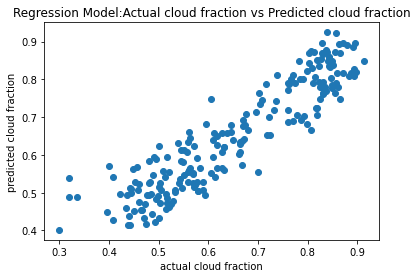

In [77]:
# Using multiple linear regression model 
regr = LinearRegression()
X=data_df[['sst','eis','t_adv','w700','rhft']]
regr.fit(X,y)
y_pred = regr.predict(X)
RSS = np.sum(np.square(y_pred - y))
RSE = math.sqrt(RSS / (len(y) - 2))

print('Residual sum of squares is :', str(RSS))
print('Residual standard error  is : ', str(RSE))

print('Can we reject the 0-hypothesis that there is no relationship between X and y?: '  + str(pvalue < 0.05))
print('R2 statistic: %.2f' % r2_score(y, y_pred))
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_) 

# Scatter plot actual cloud fraction vs predicted cloud fraction from model
plt.scatter(y,y_pred)
plt.xlabel('actual cloud fraction')
plt.ylabel('predicted cloud fraction')
plt.title('Regression Model:Actual cloud fraction vs Predicted cloud fraction')
plt.show()




From the individual linear regression it can be seen that the CLF is influenced most by the two parameters SST and EIS. There is negative relation between CLF and SST as the increase in the SST causes the decrease in the CLF and positive relation between the CLF and EIS. 
In the multiple linear regression model also the relation as indicated by coefficients is negative for the SST and positive for the EIS, however the in individual regression model there was not significant change in clf with the parameters t_adv and w700 and but in multiple regression model the coefficient for both of these are a bit high specifically for w700 (0.8736)  

__Task__:
Use a machine learning model to 
1. Predict CLF as accurately as possible [low validation error (e.g. MSE or RMSE) and high explained variance (R²), tuning of hyperparameters]
2. Plot a scatter plot of observed CLF vs. model predicted CLF for the both training and test data sets to visualize model performance and check for overfitting. Do the same for a multiple linear regression model, is the machine learning model better than the multiple regression?
3. Which predictors are most important for the model to predict CLF? [feature importance]
3. Analyze the two most important meteorological features in more detail: How do they influence the prediction of CLF? [partial dependency, SHAP] 

In [78]:

X = data_df.drop(['clf'],axis=1)
y = data_df.drop(['sst','eis','w700','rhft','t_adv'],axis=1)

# Importing necessary modules and separating training and test data sets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
# fit the regression model
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
# Computing and printing mean squared error and R2_statistics
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("R-squared:{:.2f}".format(r2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))


R-squared:0.89
The mean squared error (MSE) on test set: 0.0036


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


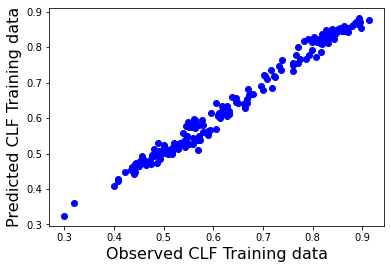

In [79]:
# scatter plot of observed CLF vs. model predicted CLF for training data 
plt.scatter(y_train,reg.predict(X_train),color='blue')
plt.xlabel('Observed CLF Training data',fontsize=16)
plt.ylabel('Predicted CLF Training data',fontsize=16)
plt.show()

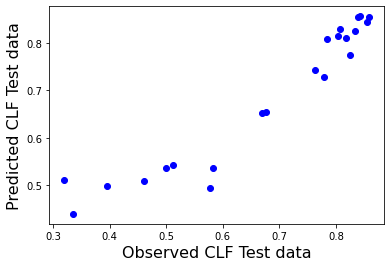

In [80]:
# scatter plot of observed CLF vs. model predicted CLF for test data 
plt.scatter(y_test,reg.predict(X_test),color='blue')
plt.xlabel('Observed CLF Test data',fontsize=16)
plt.ylabel('Predicted CLF Test data',fontsize=16)
plt.show()

In [81]:
# Using machine learning model for regression
from sklearn.model_selection import RandomizedSearchCV
random_params = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
gbrt_model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

searchcv = RandomizedSearchCV(gbrt_model, random_params, n_jobs = -1, verbose = 1, cv = 5)
searchcv.fit(X_train, y_train) 
best_gbrt_model = searchcv.best_estimator_

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",best_gbrt_model)
print("\n The best score across ALL searched params:\n",searchcv.best_score_)
print("\n The best parameters across ALL searched params:\n",searchcv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=8, subsample=0.2)

 The best score across ALL searched params:
 0.8589597177884725

 The best parameters across ALL searched params:
 {'subsample': 0.2, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.03}


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


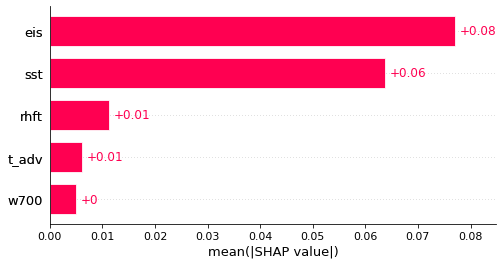

In [83]:
import shap
from sklearn.ensemble import RandomForestRegressor
X = data_df[['sst', 'eis', 't_adv', 'rhft', 'w700']]
y = data_df['clf']
model = RandomForestRegressor(n_estimators=150)
# Fits the model on the data
model.fit(X,y)
# Fits the explainer
explainer = shap.Explainer(model)
# Calculates the SHAP values
shap_values = explainer(X)
# plot the SHAP values
shap.plots.bar(shap_values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


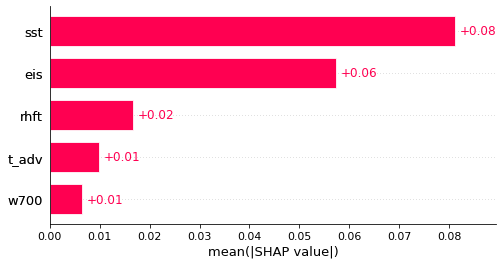

In [84]:
import shap
import xgboost as xgb
X = data_df[['sst', 'eis', 't_adv', 'rhft', 'w700']]
y = data_df['clf']
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=42)
# Fits the model on the data
model.fit(X,y)
# Fits the explainer
explainer = shap.Explainer(model)
# Calculates the SHAP values
shap_values = explainer(X)
# plot the SHAP values
shap.plots.bar(shap_values)

The two features that contributes most to our model are SST and EIS. However, when I used the Ramdom forest regressor model the most important contributing feature was EIS but on using xgboost regressor SST was the most important contributuing factor to the model. Nevertheless, in both cases the two most important contributing factor were the same pair.

## Part two: Classification in a remote sensing retrieval setting

__Task__
1. Divide data into test and training data sets
2. Train and optimize (hyperparameter tuning) a machine learning model 
3. Train a logistic regression model
4. Analyze both classifiers with a confusion matrix and perfomance metrics

In [85]:
import xarray as xr

data = xr.open_dataset('data_final_task_classification.nc') # load the data set
X = data[['IR_016','IR_039','IR_087','IR_097','IR_108','IR_120','IR_134']] # define X to be the satellite observations from different channels
X['hour'] = data.time['time.hour'] # use the hour of the observation as an additional predictor
X = X.to_dataframe() # convert to a pandas data frame

y = data.station_fls # define y to be the True/False labels from the meteorological station

# import modules 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Using the machine learning model for classification
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Computing the confusion matrix and evaluation parameters
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix and evaluation parameters 
print("Confusion matrix:\n", cm)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))


 



Confusion matrix:
 [[1045  133]
 [ 309  556]]
Accuracy: 0.78
Precision: 0.81
Recall: 0.64
F1 score: 0.72


In [86]:

from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the logistic regression model for classification
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Computing the confusion matrix and evaluation parameters
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix and evaluation parameters 
print("Confusion matrix:\n", cm)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))


Confusion matrix:
 [[977 201]
 [430 435]]
Accuracy: 0.69
Precision: 0.68
Recall: 0.50
F1 score: 0.58


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Comparing the two classification results it is clearly seen that the using a machine learning model we get higher accuracy and precision than the logistic regression model. The accuracy and precision of the confusion matrix using the Machine learning mode were 0.78 and 0.81 respectively, while using the logistic regression model the accuracy and precison values were 0.69 and 0.68 respectively.